# TODO: incorporate new info:

http://effective-altruism.com/ea/1r5/problems_with_ea_representativeness_and_how_to/f59
https://github.com/JuliaPhysics/Measurements.jl
https://claviger.net/beware-momentum.html
http://effective-altruism.com/ea/1r5/problems_with_ea_representativeness_and_how_to/
https://reducing-suffering.org/altruists-focus-reducing-short-term-far-future-suffering/#My_compromise_position
https://pythonhosted.org/uncertainties/

*Disclaimer*: the math in this blog post is an attempt to eye ball things (the fancy term is "Fermi estimates"), but I aim to be a bit more grounded by actually using some numbers from the world bank. Nonetheless, it's probably not super rigorous. Call me out on blatant errors and strawmen please.

Also, for clarity, my argument is  not that we shouldn't do more "long term" problem solving in politics today. *That* is about not doing enough problems in 30 years, which is solidly in the "near future" during this article. This is about the type of "long tail" arguments more commonly found in the EA and rationalist community than in the general public. Specifically I am taking a shot at things like [this](https://ea-foundation.org/blog/the-importance-of-the-far-future/) article by the effective altruist foundation (which to their credit explicitly makes a case WHY the far future matters to them) and [this](https://foundational-research.org/s-risks-talk-eag-boston-2017/) argument for s-risks (which doesn't and kind of assumes that you have accepted the gospel of AI x-risk already).

#  X-risk

Big word. Global level risks which might cause human extinction. We have a lot of them right now

* top soil erosion (slowly happening right now, how badly it fucks us seems to be debated?)
* loss of biodiversity (happening right now, although we will probably only know how it fucks us later)
* superbugs (probably happening due to antibiotic overuse and [capitalism not providing incentives for pharma research](https://gizmodo.com/novartis-becomes-the-latest-pharma-company-to-give-up-o-1827524081))
* **global warming** (happening right now)
* nuclear war/bio-weapon war (might happen, will probably end us if it does)

Which are all pretty pressing. But in the articles I linked, you will notice that there is a focus on other risks, like AGI, or even other unspecified "s-risks". The arguments are varied, but a lot of them rest on a very pathetic (original meaning) cornerstone:
a focus on the 

# FAR FUTURE

sometimes even in multiple dimensions/world. The (incredibly simplified) argument goes as follows:


* populations grows
* the future is longer than the past
* ergo, there are way more humans/consciousnesses in the future than the present or past, with a heavy focus on the 
* ( sometimes also: aliens, simulation which might be possible in the future, etc.)
# FAR FUTURE
* ergo, we should aim to find eternal solutions, and try to fix things right now which might have an impact in 1 million years...or should at least find "morally certain" solutions

In the article linked by the EA foundation, an argument is made that this high value placed on the far future that since we don't think *spatial* distance makes a difference in how important a life/suffering is, we shouldn't make a difference for *temporal* distance either (space-time being a thing).

I have some problems with this reasoning. Mainly with the consequences drawn,in that it tends to lure people into a very "safe" part of activism - nobody will get fired or into trouble with the establishment if they are interested in stopping extinction by some unknown x-risk in the far future. But fighting global warming in the wrong industry might cost you your job!

However, even the basic argument itself is flawed, and I shall try to summarise why in this blog post.


In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
sb.set()

# TL;DR at the top

Time is different from space because it carries with it some inherent uncertainty, which we can *probably* never get rid of for very long term views without losing intellectual humility (at least for anything interesting). Due to recursive discounting, even a small nonzero discount factor should impose a (surprisingly short) time horizon.

# Important concepts in this article

0. Limits of models
1. Temporal discount factors due to
   1. Controllability
   2. Uncertainty
   3. Caring
2. (Infinite) Integrals
4. (probably) Physical bounds like finite time
5. Satisficing


## Discount factors

When we do quantitative modeling - heck, whenever we think about things -  we *always* have to simplify and abstract things. There is an old saying that

> all models are wrong. Some models are useful

which is meant as that we very much cannot rely our explicit or implicit models to be 100% truthful, but they *can* help us guide our decision making into the right direction. 

One way we model things about which we *know* we lack certain information is explicitly modeling *confidence*  and *certainty*. 

Confidence is how sure we are in our model, and is pretty hard to formulate both *rigorously* and usefully. This is because there exists something called the "unknown unknowns", i.e., things we are not including in the model not because we have deemed them irrelevant or abstracted them away ("known unknowns"), but simply because we don't know about them. Similarly, there might be "unknown knowns", i.e. bias in our model. Getting a formal grip on this (I.e. expressing it in a number) is hard to impossible. Informally though it is easy - we all have an idea of the world that we are 100% confident in. And except when constrained through proper processes (for example having to agree with a set of people with diversely differing perspectives) , that world view tends to subtly dominate our decision making.

Certainty is easier. This is the amount of leftover, explicit "we can't know this in this model" after a prediction is made. E.g. when you know *tomorrow* a packet will arrive this is less certain than knowing either that it will arrive in a certain hour, but also less certain if you are say there is a  70% chance that it will arrive tomorrow. Not that this is all *in the model*, i.e. it all is only true if your *confidence* in the model is high. In general, everything else being equal more certainty should mean less confidence -  I am pretty confident that with high probability I will die *some day*. Ask me to predict the year with a certainty of 80% and I'm very much *not confident* in my prediction, even though it has a high "certainty".

Certainty can usually be expressed either in uncertainty bounds which are propagated (either by hand or by using software like [guesstimate](https://www.getguesstimate.com/), [pyMC3](https://docs.pymc.io/) and [others](https://en.wikipedia.org/wiki/List_of_uncertainty_propagation_software)) or if all you care about is a "weighing" of a reward of some kind by a simple discount factor $0\leq \gamma \leq 1$ where $\gamma=0$ means in your model you are *certain* something won't play a role and should be discounted, and $\gamma=1$ means your model weighs something much higher.

These discount factors can be used to abstract other things, most commonly

* uncertainty (as I said)
* risk
* your personal "preference" for something (i.e. how much you care)
* controllability (this can sometimes be subsumed in certainty)
* decay/interest 


One classical example is how you should think about investments. If you have 1000 € today, and some one offers you a business which returns 200€ every year for 6 years, should you invest?  To reason about this you should at least model 2 things

* what is the risk you are taking?
* what other opportunities are there?

If you can't quantify the risk, the next best thing is to take the "most conservative investment possible" and compare with that. This is referred to as the [risk free rate](https://en.wikipedia.org/wiki/Risk-free_interest_rate) and usually the closest you can get is short term domestic government bonds (at least if you live in Europe or the US). Investopedia has an [interesting tidbit](https://www.investopedia.com/terms/r/risk-freerate.asp) on how this can get pushed to the extreme: the risk free rate in Europe is/was negative following the lingering financial crisis, meaning people feared losing their money so much they were willing to *definitely lose some of it* instead of facing inflation or other types of risk.

What you do then is you sum up the amount returned every year and compare it with the return in the alternative investment. Here is one way to do it:

In [1]:
years = list(range(6))
inv = 1000
ret1 = len(years)*200 # yearly return times how many years you get the return
ret2 = 1000 * (1+0.02)**years[-1] # compound yield of 0.02 over the total number of years
ret1,ret2

(1200, 1104.0808032)

This gives you the return in future money. Another way to do it though is

In [3]:
years = list(range(6))
inv = 1000
ret1 = sum([200 * (1-0.02)**y for y in years]) # each year, we discount by (1-alternative yield)
ret2 = 1000 # todays lump of cash
ret1,ret2

(1141.57619136, 1000)

This is the total return over 6 years *discounted* as if it was a lump sum of cash right now. This becomes important if you need to compare things which don't grow at the same interval, e.g. instead of giving you 200 € every year, the promise is that you can sell something for double the price in 50 years. How do those numbers look?

In [4]:
years = list(range(50))
inv = 1000
ret1 = 2*inv # lump sum in 20 years
ret2 = 1000 * (1.02)**years[-1] # compound yield over the total number of years
print(f"Future money: {ret1} vs {ret2}")
ret1 = 2*inv*0.98**years[-1] # lump sum in 20 years
ret2 = 1000 # lump sum today
print(f"Todays money: {ret1} vs {ret2}")


Future money: 2000 vs 2638.8117932094196
Todays money: 743.2034287492179 vs 1000


Usually, it is easier to reason about something in the smaller, immediate values, since we *know* how much we value our cash *right now*. Discounting can also be used to compare different investment horizons and risk profiles, by simply including it in the discount factors. E.g., if for the second example you give the endeavour a 3% chance of going bust before you get your cash vs. having full trust in the bonds, then the math looks like this  

In [5]:
years = list(range(6))
inv = 1000
ret1 = 0.0*0.03 + 0.97*sum([200 * (1-0.02)**y for y in years]) # yield discounted return, again discounted by risk
ret2 = 1000 # todays lump of cash
ret1,ret2

(1107.3289056192, 1000)

# To the far future

So, the different discount factors allow us to think of far off things in todays terms. 

How do we apply this to the argument of weighing the inhabitants of the infinite future (leaving aside the nitpicks about finite universe before entropy death etc.)?

First we need some data about the world population so far, which we get from [the world bank](https://data.worldbank.org/indicator/SP.POP.TOTL)

In [2]:
x=np.arange(0,10e3,1)

In [3]:
# load worldbank data on world population
# Download
d = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_9908626/API_SP.POP.TOTL_DS2_en_csv_v2_9908626.csv",skiprows=4)

In [4]:
dw=d[d["Country Name"]=="World"]

In [5]:
dw

Country Name Country Code     Indicator Name Indicator Code          1960  \
257        World          WLD  Population, total    SP.POP.TOTL  3.032160e+09   

             1961          1962          1963          1964          1965  \
257  3.073369e+09  3.126510e+09  3.191786e+09  3.257460e+09  3.324545e+09   

        ...               2009          2010          2011          2012  \
257     ...       6.849573e+09  6.932881e+09  7.014999e+09  7.099549e+09   

             2013          2014          2015          2016  2017  Unnamed: 62  
257  7.185078e+09  7.271228e+09  7.357370e+09  7.444027e+09   NaN          NaN  

[1 rows x 63 columns]

In [6]:
years=range(1960,2017)
fut=np.array(list(range(2016,2050)))
far_fut=np.linspace(2049,6e9,1000) # the reason for the cutoff at 6e9 will come later
pop=np.array(dw[[f"{y}" for y in years]]).flatten()

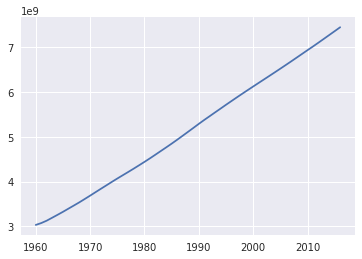

In [7]:
plt.plot(years,pop)

Nice. Now, to my best knowledge, the current estimate is that the world population will max at at 9.5 billion people in 2050. So for the near future we get this graph:

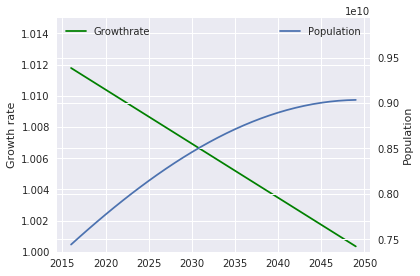

In [39]:
# population growth in 2016
g2016=pop[-1]/pop[-2]
# simplified: assume linear decay to 1.0 until 2050
g2050=1
gTillThen=[g2016-(y*(g2016-g2050)/(2050-2016)) for y in range(2050-2016)]
fig, ax1 = plt.subplots()

p1=ax1.plot(range(2016,2050),gTillThen,label="Growth rate",color="green")
ax1.legend(loc='upper left')
ax1.set_ylim(1.0,1.015)
popfut=np.zeros(2050-2016)
popfut[0]=pop[-1]
for y in range(1,2050-2016):
    popfut[y]=popfut[y-1]*gTillThen[y]
ax2=ax1.twinx()
ax2.plot(range(2016,2050),popfut,label="Population")
ax2.legend(loc='upper right')

ax2.set_ylim(ax2.get_ylim()[0],np.max(popfut)*1.1)
ax2.set_ylabel("Population")
ax1.set_ylabel("Growth rate")
fig.tight_layout()

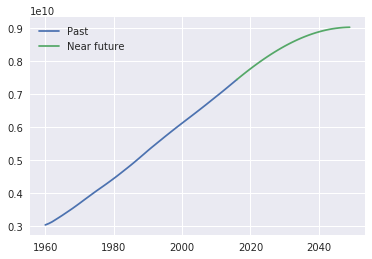

In [40]:
plt.plot(years,pop,label="Past")
plt.plot(fut,popfut,label="Near future")
plt.legend()

Let's make a *very* lazy simplification and postulate that the number of people will stay constant forever afterwards (let's assume one of these superbugs causes wolverine style immortality AND infertility) . We'll revisit this later on. (Oh, and we'll make an equally lazy simplification about the past and assume the world started existing in 1960).

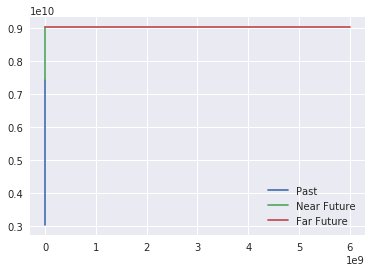

In [41]:
def far_fut_pop(y):
    return popfut[-1]*np.ones_like(y)

plt.plot(years,pop,label="Past")
plt.plot(fut,popfut,label="Near Future")
plt.plot(far_fut,far_fut_pop(far_fut),label="Far Future")
plt.legend()

Cool. We now have an idea of the world population. If we want to use this for moral considerations, one question we might want to ask is how much "weight" we want to put onto each period (past, near future, far future). Let's say we care equally about every person ever(i.e. 1 person = 1 unit of caring/1 moral weight point), how can we calculate the "total amount of caring" for each period?

This is where (infinite) integrals and nitpicking comes into play. 

# Integrals

For a quick refresher, an integral is this expression

$$ \int f(x) dx $$

more precisely this is an *indefinite* integral, since it doesn't have bounds. This is equivalent to asking the following

> Given a function y=f(x), which describes a graph in the x-y plan, can we make a function F(x) which for every x describes the total area under that function from $-\infty$ to x?

If this function exists, it is this indefinite integral. The shape it takes is 
$$
\int f(x) dx = F(x) + c\\
\frac{d}{dx}F(x)=f(x)
$$

Where c is the "lower point" of our area (since the space below the graph is open unless we arbitrarily decide to e.g. set $c=0$ and measure the area between the x-axis and the graph).

If we can get this integral for our population graph, we can plug in boundary conditions and use the *definite integral* to calculate the total amount of caring.

$$ \int_{x_{start}}^{x^{stop}} f(x) dx = F(x_{stop})-F(x_{start})$$

So

$$
Care_{past} = \int_{1960}^{2016} f(x) dx\\
Care_{near} = \int_{2016}^{2050} f(x) dx\\
Care_{far} =  \int_{2050}^{\infty} f(x) dx\\
$$

For the past and the near future we can calculate this numerically, and since we are assuming constant population for the future, we can simply calculate the area for the far future:

In [15]:
import scipy as sp
# use a simple cumulative integrator to approximate the integral for past and near future
care_past=sp.integrate.cumtrapz(x=years,y=pop)
care_near=sp.integrate.cumtrapz(x=fut,y=popfut)
# since population is constant, this is the area of a rectangle of (population -1)*(endpoint-start_point)
care_far=9.5e9*(np.infty-2050)
# display with scientific notation since we are doing estimates. for past and near we only look at the value F(end)-F(start).
print(f"Past: {care_past[-1]-care_past[0]:.0}\nNear Future: {care_near[-1]-care_near[0]:.0}\nFar Future: {care_far:.0}")

Past: 3e+11
Near Future: 3e+11
Far Future: inf


Huh. Before we continue, let's do a quick sanity check

Past: 3e+11,Near:3e+11


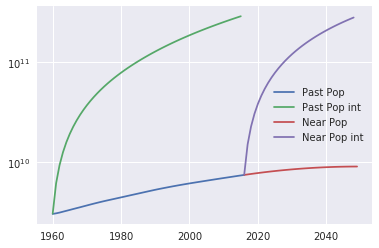

In [16]:
# we should be able to eye ball if accumulation per year makes sense
plt.plot(years,pop,label="Past Pop")
plt.plot(years[:-1],care_past,label="Past Pop int")
plt.plot(fut,popfut,label="Near Pop")
plt.plot(fut[:-1],care_near,label="Near Pop int")
plt.yscale("log")
plt.legend()
# average population over timespan times total time should be in the ballpark of our integral
print(f"Past: {(2016-1960)*np.mean(pop):.0},Near:{(2050-2016)*np.mean(popfut):.0}")

Okay, past and near future makes sense. Obviously, we can't change the past, so the "weight" of the past is actually not that important, I just like to have it as perspective.

As for the "inf" for the far future, well, that's what happens if you bring in infinity willy nilly:. Math stops making sense. Usually there's three ways to resolve this:

1. fix your model by removing the infinity. [According to this article](https://news.nationalgeographic.com/news/2010/10/101027-science-space-universe-end-of-time-multiverse-inflation/) the current estimate for end of time is 5 billion years, so we can use that (this is also the reasons why I limited the `far_fut` variable to 6e9 before))
2. fix your model by "balancing" the infinity: either find some other infinity that you can use to cancel it out, or use "converging" models. More on this in a second
3. Abandon the attempt at modeling, because you either don't understand the question enough, or it *doesn't make sense to think of in abstract terms*. More on this towards the end.

# 1. Set $x_{stop} =\infty \approx 5.e9$ years


In [44]:
import scipy as sp
# use a simple cumulative integrator to approximate the integral for past and near future
care_past=sp.integrate.cumtrapz(x=years,y=pop)
care_near=sp.integrate.cumtrapz(x=fut,y=popfut)
# since population is constant, this is the area of a rectangle of (population -1)*(endpoint-start_point)
care_far=9.5e9*(5e9)
# display with scientific notation since we are doing estimates. for past and near we only look at the value F(end)-F(start).
print(f"Past: {care_past[-1]-care_past[0]:.0}\nNear Future: {care_near[-1]-care_near[0]:.0}\nFar Future: {care_far:.0}")

Past: 3e+11
Near Future: 3e+11
Far Future: 5e+19


Huzza, we have a finite weight for the far future. And it is 8 orders of magnitude larger than the far future, which means we are done right? Let's focus our resources on making sure we solve our current problems *long term*, the payoff for future generations is more than worth some delay.

Well, maybe not necessarily.

# 2. Get our model to converge

This actually works in conjunction with removing the infinity, but has the added benefit of being robust if our current understanding of time is *wrong* and we actually have an infinite future.

Basically, there is a way for an integral like this to exist:

$$ \int_\infty^\infty f(x) dx = const $$

where the right hand side is a constant. How? By ensuring that the function converges (gets closer and closer to a value and *stays there* once reached) to zero at the infinities:

$$
\lim_{x\to \infty} f(x)=0\\
\lim_{x\to -\infty} f(x)=0\\
$$

One example are probabilities: since the probability of ANYTHING(including nothing) happening is $1$, the integral or sum over all probabilities must be $1$ as well.

So how do we get this for our weigh integral? Why, with discount factors!

## Using discount factors for convergence

You can make a strong argument that we shouldn't value the far future quite as highly as the near future.

For one, unlike with spatial distance, you can't really control future results beyond a certain degree, no matter how hard you try (unknown unknowns and biases, remember?). So you should probably have some discount factor for *imperfect control*.

Secondly, how sure are you in your understanding of things over a large time horizon? The world changes, and so does our understanding of the world we knew *so far*. This means sometimes we overall understand the world more (physics for example we are slowly learning more and more without it changing to much...as far as we know), sometimes our understanding of the world drifts away from how it actually is developing and we are suddenly faced with the discrepancy (ask Hillary Clinton). Since information seems to only flow forward in time (causality has so far survived all our physicists assassination attempts), there is again a limit on how sure you can be about something surviving a travel through time, unlike for space where we are pretty good at moving things and models without breaking them.<sup>Even though your experience with underpaid delivery services might differ</sup> That's another discount factor.

Finally, you might simply not *care* as much about the far future as you do for the near future. I personally am a horrible person, and if I'm honest with my self I don't really care about anything beyond 10000 years in the future. Some people are very good people and care much longer, and some in my opinion equally good people *more* care about the people living right now than about hypothetical people. Whatever your reason is, this warrants another part of the discount factor.

Let's define two discount functions: 

1. One that takes the number years you look into the future and applies a fixed discount factor recursively every year, to express the fact that our prediction of *two* years in advance is equivalent to predicting how we would predict *one* year in advance *in* one year. This is called [exponential discounting](https://en.wikipedia.org/wiki/Exponential_discounting) and has the benefit of being consistent and rational....but is not really how humans seem to do things 
2. One that seem to be closer to how humans do things,  [hyperbolic discounting](https://en.wikipedia.org/wiki/Hyperbolic_discounting). This has slower discounting and effectively "stops" discounting in the far future.



In [45]:
# yes, we could set a simple k=1-care*control*certainty, but I think for *feeling* the effects
# having them separate is valuable
# also, we express positive certainty values, so lower values make the discount factor higher

def exp_discount(dy,care=1.0,control=1.0,certainty=1.0):
    return np.exp(-(1-(care*control*certainty))*dy)


def hyp_discount(dy,care=1.0,control=1.0,certainty=1.0):
    return 1/(1+(1-care*control*certainty)*dy)
x=np.arange(0,100,1)

And let's plot the functions

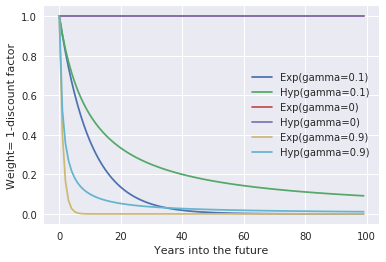

In [46]:
plt.plot(x,exp_discount(x,0.9),label="Exp(gamma=0.1)")
plt.plot(x,hyp_discount(x,0.9),label="Hyp(gamma=0.1)")

plt.plot(x,exp_discount(x),label="Exp(gamma=0)",marker="+")
plt.plot(x,hyp_discount(x),label="Hyp(gamma=0)",marker="x")

plt.plot(x,exp_discount(x,0.1),label="Exp(gamma=0.9)")
plt.plot(x,hyp_discount(x,0.1),label="Hyp(gamma=0.9)")

plt.xlabel("Years into the future")
plt.ylabel("Weight= 1-discount factor")
plt.legend()

Next we use our model for world population again, but this time including discount factors. Let's assume we fully care about the future and are 100% certain about the best way forward, we are just slightly uncertain about our ability to control random meteorite impacts during our glorious march into the future:

$$
care=1.0\\
certainty=1.0\\
control=0.99999
$$

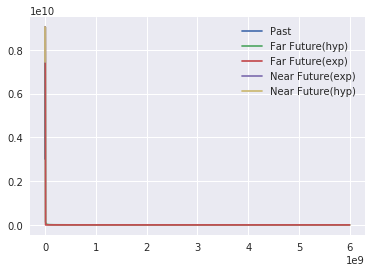

In [47]:
plt.plot(years,pop,label="Past")

plt.plot(far_fut,hyp_discount(far_fut-far_fut[0],control=0.99999)*far_fut_pop(far_fut),label="Far Future(hyp)")
plt.plot(far_fut,exp_discount(far_fut-far_fut[0],control=0.99999)*far_fut_pop(far_fut),label="Far Future(exp)")
plt.plot(fut,exp_discount(fut-fut[0],control=0.99999)*popfut,label="Near Future(exp)")
plt.plot(fut,hyp_discount(fut-fut[0],control=0.99999)*popfut,label="Near Future(hyp)")
plt.legend()

So in the long run, this seems to drop of quite dramatically. How doe our integrals look? First for exponential discounting, then for hyperbolic:

In [48]:
# since we now have a discount function, we need to numerically integrate the far future as well
pop_far_exp = exp_discount(far_fut-far_fut[0],control=0.99999)*9.5e9
pop_far_hyp = hyp_discount(far_fut-far_fut[0],control=0.99999)*9.5e9
care_past=sp.integrate.cumtrapz(x=years,y=pop)
care_near=sp.integrate.cumtrapz(x=fut,y=exp_discount(fut-fut[0],control=0.99999)*popfut)
# since population is constant, this is the area of a rectangle of (population -1)*(endpoint-start_point)
care_far=sp.integrate.cumtrapz(x=far_fut,y=pop_far_exp)
# display with scientific notation since we are doing estimates. for past and near we only look at the value F(end)-F(start).
print("Exponentially discounted weight:")
print(f"Past: {care_past[-1]-care_past[0]:.0}\nNear Future: {care_near[-1]-care_near[0]:.0}\nFar Future: {care_far[-1]-care_far[0]:.0}")

care_past=sp.integrate.cumtrapz(x=years,y=pop)
care_near=sp.integrate.cumtrapz(x=fut,y=hyp_discount(fut-fut[0],control=0.99999)*popfut)
# since population is constant, this is the area of a rectangle of (population -1)*(endpoint-start_point)
care_far=sp.integrate.cumtrapz(x=far_fut,y=pop_far_hyp)
# display with scientific notation since we are doing estimates. for past and near we only look at the value F(end)-F(start).
print("Hyperbolically discounted weight:")
print(f"Past: {care_past[-1]-care_past[0]:.0}\nNear Future: {care_near[-1]-care_near[0]:.0}\nFar Future: {care_far[-1]-care_far[0]:.0}")

Exponentially discounted weight:
Past: 3e+11
Near Future: 3e+11
Far Future: 0e+00
Hyperbolically discounted weight:
Past: 3e+11
Near Future: 3e+11
Far Future: 7e+15


Using our teeny-tiny discount factor, the far future becomes completely negligible in exponential discount and only 4 orders of magnitude larger than the near future in hyperbolic discounting. Now, let's assume we are a bit more humble about our ability to control things, slightly less sure about our moral certainty, and also admit that we care *slightly* more about our own future than about the far future. In other words, let's use:

$$
care=0.99999\\
certainty=0.99999\\
control=0.99
$$

In [49]:
# since we now have a discount function, we need to numerically integrate the far future as well
pop_far_exp = exp_discount(far_fut-far_fut[0],control=0.99,care=0.99999,certainty=0.99999)*9.5e9
pop_far_hyp = hyp_discount(far_fut-far_fut[0],control=0.99,care=0.99999,certainty=0.99999)*9.5e9
care_past=sp.integrate.cumtrapz(x=years,y=pop)
care_near=sp.integrate.cumtrapz(x=fut,y=exp_discount(fut-fut[0],control=0.99,care=0.99999,certainty=0.99999)*popfut)
# since population is constant, this is the area of a rectangle of (population -1)*(endpoint-start_point)
care_far=sp.integrate.cumtrapz(x=far_fut,y=pop_far_exp)
# display with scientific notation since we are doing estimates. for past and near we only look at the value F(end)-F(start).
print("Exponentially discounted weight:")
print(f"Past: {care_past[-1]-care_past[0]:.0}\nNear Future: {care_near[-1]-care_near[0]:.0}\nFar Future: {care_far[-1]-care_far[0]:.0}")

care_past=sp.integrate.cumtrapz(x=years,y=pop)
care_near=sp.integrate.cumtrapz(x=fut,y=hyp_discount(fut-fut[0],control=0.99,care=0.99999,certainty=0.99999)*popfut)
# since population is constant, this is the area of a rectangle of (population -1)*(endpoint-start_point)
care_far=sp.integrate.cumtrapz(x=far_fut,y=pop_far_hyp)
# display with scientific notation since we are doing estimates. for past and near we only look at the value F(end)-F(start).
print("Hyperbolically discounted weight:")
print(f"Past: {care_past[-1]-care_past[0]:.0}\nNear Future: {care_near[-1]-care_near[0]:.0}\nFar Future: {care_far[-1]-care_far[0]:.0}")

Exponentially discounted weight:
Past: 3e+11
Near Future: 2e+11
Far Future: 0e+00
Hyperbolically discounted weight:
Past: 3e+11
Near Future: 2e+11
Far Future: 7e+12


We are almost even in the same order of magnitude for the moral weight we assign to the next 34 years and *the 5 billion years* after that. This should serve to make points:

* if we use any discount factor at all, the far/infinite future loses out against the near future pretty quickly if we try to use "cumulative moral weight" as an argument
* we should ask ourselves if this is a suitable argument to make

# 3. When infinities tell you  making models maybe isn't enough

## or 

# Isn't his horribly simplistic?

Why yes, yes it is.

That's the point. Trying to do moral calculus while sometimes necessary *always* leads to some degree of oversimplification. So while mixing physical and quantitative models with moral arguments is sometimes useful to consider, and it is *very* tempting to try and base your moral decision on "quantitative" measures, I inherently distrust any argument where the modeling makes things "easier" (as in the case with an overwhelming far future) and not more complex (as in the case of how much you discount things, resulting in the question on where you draw your cut off). And any argument which then draws *mainly* on the model which makes things easier becomes suspect as well (as in the case of an AGI  x risk).

We still have neglected a huge amount in this model, the two largest problems being

* the population of concern might grow, or shrink in future
* our discount factors and functions are pretty arbitrary and might *change over time*.

Even if we adapt the model to all all of those, we might still want to have low confidence in it, since we had to fiddle with it so much, and since it just "feels wrong" (or if you want to use the fancy newspeak, our prior assigns low probability to the outcomes).

This is where *human judgement* with all of its flaws comes into the decision making. This is where we argue about different models, look for more evidence, but also argue about the basic premises of the question. The first step towards this though, is to *accept there is a difference in moral weight of the long run vs. the near future*, even when accepting basic premises like utilitarianism etc. which are kinda necessary for s-risk arguments (which often rely on "unimaginable amounts of suffering") and x-risk arguments (which often rely on a small probability "long tail" event with horrible results for the far future).

# Conclusion, Satisficing and pure personal opinions

So in a nutshell, what does this mean?

First, as a reminder, my argument is  not that we shouldn't do more "long term" problem solving in politics today. *That* is about not doing enough problems in 30 years, which is solidly in my "near future" range. All of the above is for the type of arguments I usually encounter when debating with "rationalist" and similar communities on the internet/while hanging out with the EA crowd.

In *that context*,  this whole article is about explaining why in my opinion the "far future", not to speak of the "infinite future", should not be weighed as high, since

1. it isn't as infinite as it sounds
2. unless you are god, after a few million years, you can't influence it anyway
3. when discounted properly, it is actually pretty unimportant compared to the medium and near term future

Second, the same argument that applies for time also applies for probability: a lot of AGI arguments use the "small probability, UNIMAGINABLE negative consequences" scare tactics, without even *trying* to properly put estimates on there. If you compare possibly tiny unknown risks vs. the risk of dying in a car crash or climate change, and you weigh the first higher, I argue this is faulty. Especially when also discounting for controllability and certainty about consequences.

Third, I think the idea of [satisficing](https://en.wikipedia.org/wiki/Satisficing) is underrated. For those unfamiliar with it, the idea is an attempt to give formal grounding for the idea commonly expressed as

> the perfect is the greatest enemy of the good

i.e. looking for a perfect solution under resource constrained can be less efficient than looking for the first solution which is "good enough". A example from Wikipedia:

>Example: A task is to sew a patch onto a pair of jeans. The best needle to do the threading is a 4 inch long needle with a 3 millimeter eye. This needle is hidden in a haystack along with 1,000 other needles varying in size from 1 inch to 6 inches. Satisficing claims that the first needle that can sew on the patch is the one that should be used. Spending time searching for that one specific needle in the haystack is a waste of energy and resources. 

In optimization terms, finding locally optimal solutions quickly can beat finding globally optimal solutions slowly.

In our context, I argue that focusing on finding solutions that 

* ensure we deal with *current* issues like climate change, top soil erosion etc. *right now*, i.e. in 5-30 years
* preserve our ability to change and adapt our situation to improved long term understanding
* give us new options in decision making 

has a higher payoff than focusing finding some solutions for concerns in the next 1000 years..

## Constructive suggestions

With that I personally think we should approach policy planning roughly like this:

1. For the far future, try to be in the right half space of decision making. A heuristic can be walking *away* from definitely bad decisions, like an SVM: you don't care to get closer to good ones, or to avoid unknowns, just get away from the ones you know or suspect
2. In the medium term, we should invest more effort than right now. Medium term being 30 years, i.e. after we are dead.
   > Society grows if men plant trees in whose shade they shall never sit
3. The short term is maybe a bit overstated right now, though there are pressing issues which can be dealt with right now. A heuristic could be: if it enables medium term decision making, it's good.
5. Making more options is good. Protecting the weak (John Rawls [veil of ignorance](https://en.wikipedia.org/wiki/Veil_of_ignorance)) is good. Decentralisation and robustness is good, unless you need to centralise in one aspect to ensure decentralisation in another. Checks and balances are good. Concentrated power is iffy. 
6. HAVE HIGH DISCOUNT FACTORS FOR FUZZY CONCERNS. This is mainly about moral problems, or problems which are not here yet. There is a concept called satisficing: find good solutions, fast (in a limited time budget). This applies for stuff like the x-risks I listed above: we need to solve those ASAP. Then, once we are sure we can *get* to the far future, we can *worry* about the far future. By using the previous heuristics, we should be in a part of the search space *then* to solve the problems we know a lot more about



## Other constructive comments and links

* I agree with [Robert Reichs](http://www.econtalk.org/archives/2017/09/rob_reich_on_fo.html) criticism of philanthropy, and am in favour of spend down rules for foundations, as well as democratic oversight and the elimination of tax credits for donations in excess of 10 median yearly wages
* I also agree with [Jerry Muller](http://www.econtalk.org/archives/2018/04/jerry_muller_on.html) that we currently undervalue human decision making vs trying to offload onto models and measures
* I think the idea of satisficing while keeping the long term in mind should be more widespread, it has a humble quality to it

# An attempt at [Steel manning](https://wiki.lesswrong.com/wiki/Steel_man): Holes in this article and (some) counters:

* What about continued exponential growth in population?
  1. HOW? 
  2. Adapt the discount factors to match (e.g. factor in uncertainty about whether simulated space communism is actually gonna happen)
  3. doesn't fix the core point of being careful with placing our confidence in long-running models
* What about non-human people (AI, animals, aliens,...)?
  1. This only increases the total sum by a constant factor
  2. I *really* have a problem with using the same weight on animals as for humans, and need to see evidence for AI/aliens. I concede this is a philosophical valid argument though. 
* This neglects long tails/unknown unknowns! We should spend some resources/time finding those unknown unknowns/taking care of the long tail 
  * True, but I'd argue right now the big problem is a lack of focus on the medium tail, and the known unknowns (see the initial point about people doing "safe" activism"
  * You can never get 100% secure, there are diminishing returns. This is just made worse when you do any form of discounting. The 80/20 rule and satisficing makes it more likely that we will have a chance to *encounter* those risks, let alone deal with them
  * I am not saying we should put *zero* effort into considering the long tail though. Nassim Talebs [barbell strategy](https://www.investopedia.com/articles/investing/013114/barbell-investment-strategy.asp) and thoughts on robustness and anti-fragility are very interesting in my opinion (no matter what you think of the man otherwise)...but they also push towards conservatism in the majority and in putting less trust in models. 
  * Even for research, there are diminishing returns **if your goal is some form of optimal/data/evidence based decision making**. There is a concept of the [Price of perfect information](https://en.wikipedia.org/wiki/Expected_value_of_perfect_information) which can give you a hint on how much effort you should put into getting things perfectly right - at some point it's better to just make the decision vs. doing more research. So if you obsess about the meta ethics, ultra long run solutions or are trying to minimize uncertainty, then cool if it gives you something (and indeed, it's good that it does for some people, because that means we don't need to worry about being completely wrong in our current understanding of what is "good": if it was completely wrong, we would have found out. It might still be subtly wrong though). But you do not have to do this in order to have positive "impact" ( a concept I have separate issues with).
* Are you saying we shouldn't use this type analysis at all?
  * No, I hope it doesn't come across like this. I think there is value in making explicit models to clarify your thinking, and if you can make reasonable models that help you expose gaps in your assumptions, directions for research or just clarify your thinking, cool. And as I said, I am glad that people to this type of research and take it more serious than me, because then *if I am wrong*, they will hopefully tell me, and hopefully I will accept solid arguments then. All I am saying is be mindful of the limits of modelling, of implicit assumptions and how certain you think you can get with models...all models are wrong. At some point trying to hard to get them right makes them not not useful or even harmful.

# BONUS:
A rough sketch of my personal discount factors as of 2018-05-22, just gut feeling level values for today.

In [53]:
control= 0.5  # I think we are overall able to influence things, but there is a huge component of luck involved...so just about a coin toss overall
certainty= 0.6 # I am in constant doubt, but we *have* to act, so a bit more than coin flip here
care= 0.9 # I care a lot, BUUUT...

def exp_discount(dy):
    post_cliff= dy>70
    time_cliff=np.ones_like(dy)
    time_cliff[post_cliff]=0.1
    return np.exp(-(1-time_cliff *(care*control*certainty))*dy)


def hyp_discount(dy):
    post_cliff= dy>70
    time_cliff=np.ones_like(dy)
    time_cliff[post_cliff]=0.1
    return 1/(1+(1-care*control*certainty)*dy)

# The world will change, I will be old and close to dying and the dead don't care at all anymore. 
# So I don't think I will fully care as much as now in 70 years,and it's kind of NOT MY JOB to fix the world then.
# By then my descendants need to grow up and take over, and I'll defer to them (unless I go senile).
# And I care about THEM (since they will exist in <70 years) a lot.
# To be honest, even 70 years is kinda pushing it. I will hopefully live at least that long however, so let's be generous
# since we now have a discount function, we need to numerically integrate the far future as well
pop_far_exp = exp_discount(far_fut-far_fut[0])*9.5e9
pop_far_hyp = hyp_discount(far_fut-far_fut[0])*9.5e9
care_past=sp.integrate.cumtrapz(x=years,y=pop)
care_near=sp.integrate.cumtrapz(x=fut,y=exp_discount(fut-fut[0])*popfut)
# since population is constant, this is the area of a rectangle of (population -1)*(endpoint-start_point)
care_far=sp.integrate.cumtrapz(x=far_fut,y=pop_far_exp)
# display with scientific notation since we are doing estimates. for past and near we only look at the value F(end)-F(start).
print("Exponentially discounted weight:")
print(f"Past: {care_past[-1]-care_past[0]:.0}\nNear Future: {care_near[-1]-care_near[0]:.0}\nFar Future: {care_far[-1]-care_far[0]:.0}")

care_past=sp.integrate.cumtrapz(x=years,y=pop)
care_near=sp.integrate.cumtrapz(x=fut,y=hyp_discount(fut-fut[0])*popfut)
# since population is constant, this is the area of a rectangle of (population -1)*(endpoint-start_point)
care_far=sp.integrate.cumtrapz(x=far_fut,y=pop_far_hyp)
# display with scientific notation since we are doing estimates. for past and near we only look at the value F(end)-F(start).
print("Hyperbolically discounted weight:")
print(f"Past: {care_past[-1]-care_past[0]:.0}\nNear Future: {care_near[-1]-care_near[0]:.0}\nFar Future: {care_far[-1]-care_far[0]:.0}")

Exponentially discounted weight:
Past: 3e+11
Near Future: 5e+09
Far Future: 0e+00
Hyperbolically discounted weight:
Past: 3e+11
Near Future: 3e+10
Far Future: 9e+10
